<a href="https://colab.research.google.com/github/alhafizfadhil/ML-and-Data-Science-Projects/blob/main/Image%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam


fashion_mnist=tf.keras.datasets.fashion_mnist
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

train_X=train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2], 1)
test_X=test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[1], 1)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot']

In [ ]:
train_label=tf.keras.utils.to_categorical(train_Y,num_classes=10)
test_label=tf.keras.utils.to_categorical(test_Y,num_classes=10)

#train_data=tf.expand_dims(train_X,-1)
#test_data=tf.expand_dims(test_X,-1)

In [ ]:
train_input=tf.data.Dataset.from_tensor_slices((train_X,train_label)).batch(80)
test_input=tf.data.Dataset.from_tensor_slices((test_X,test_label)).batch(80)


In [ ]:
input_data=tf.keras.layers.Input([28,28,1])


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()
opt = Adam(learning_rate=1e-3, decay=1e-3 / 80)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                      

In [ ]:
start = time.time()

model.fit(train_input, epochs=10)

end = time.time()
cnn_mnist_time = end-start
print("Total training time is {:0.2f} minute".format(cnn_mnist_time/60.0))

Epoch 1/10
750/750 [==============================] - 20s 9ms/step - loss: 0.7427 - accuracy: 0.7253
Epoch 2/10
750/750 [==============================] - 7s 9ms/step - loss: 0.4375 - accuracy: 0.8401
Epoch 3/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3609 - accuracy: 0.8694
Epoch 4/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3218 - accuracy: 0.8830
Epoch 5/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2937 - accuracy: 0.8937
Epoch 6/10
750/750 [==============================] - 7s 10ms/step - loss: 0.2789 - accuracy: 0.8978
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2655 - accuracy: 0.9045
Epoch 8/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2536 - accuracy: 0.9075
Epoch 9/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2433 - accuracy: 0.9121
Epoch 10/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2359 - accuracy: 0.91

In [ ]:
model.evaluate(test_input)

125/125 [==============================] - 1s 5ms/step - loss: 0.2248 - accuracy: 0.9203


[0.224784716963768, 0.9203000068664551]

In [ ]:
cnn_pred_mnist = model.predict(test_X)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(test_label,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_accuracy_mnist = metrics.accuracy_score(y_true, cnn_pred_mnist)
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)

print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_mnist))
print("Accuracy score: {}".format(cnn_accuracy_mnist))
print("Confusion matrix: \n", cnn_cm_mnist)
print('\n', metrics.classification_report(y_true, cnn_pred_mnist))

-----------------Convolutional Neural Network Report---------------
F1 score: 0.9128509350794427
Accuracy score: 0.9124
Confusion matrix: 
 [[806   0  18  22   5   1 145   0   3   0]
 [  0 980   0  15   2   0   2   0   1   0]
 [ 10   1 796   8 120   0  65   0   0   0]
 [  4   1   6 931  34   0  24   0   0   0]
 [  0   0   6  18 938   0  38   0   0   0]
 [  0   0   0   0   0 970   0  18   0  12]
 [ 57   0  38  34  87   0 781   0   3   0]
 [  0   0   0   0   0   3   0 968   0  29]
 [  0   0   0   5   5   2  11   1 976   0]
 [  0   0   0   0   0   3   0  18   1 978]]

               precision    recall  f1-score   support

           0       0.92      0.81      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.92      0.80      0.85      1000
           3       0.90      0.93      0.92      1000
           4       0.79      0.94      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.78      0.76     

In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


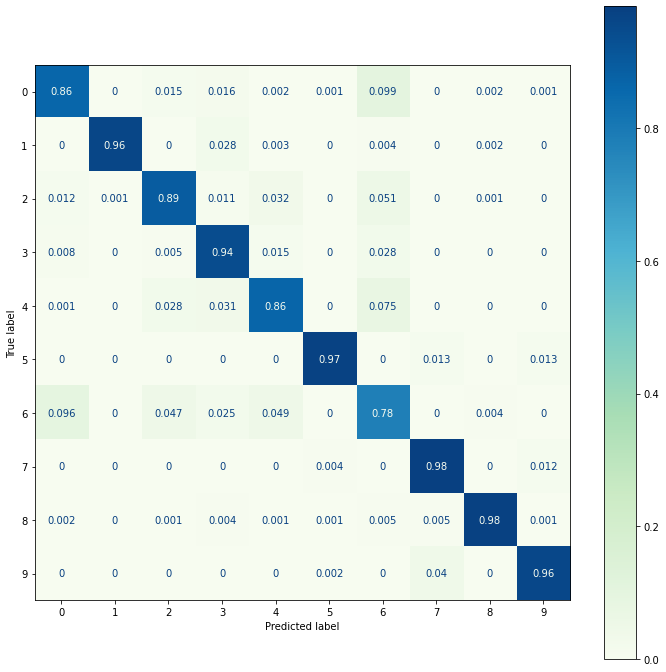

In [ ]:
#plt.figure()
#plot_confusion_matrix(classifier, X=test_X, y_true=test_Y)
#plt.show()

figsize = (12,12)
plot_confusion_matrix(classifier, X=test_X, y_true=test_Y, cmap='GnBu', normalize='true', ax=plt.subplots(figsize=figsize)[1])

In [ ]:
print(test_Y)

[9 2 1 ... 8 1 5]
